# SEGD Goalie Evaluation Framework Implementation


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Initial Exploration


In [2]:

# Let's load the sample data first to understand its structure
print("Loading the hockey event data...")

try:
    # Try to load from the uploaded file - this is what we'll use if the file is accessible
    data = pd.read_csv('Linhac24-25_Sportlogiq.csv', low_memory=False)
    print(f"Successfully loaded dataset with {data.shape[0]} rows and {data.shape[1]} columns.")
except:
    # If the file isn't accessible, load the sample data from the conversation
    print("Could not access the full file, using the sample data from the conversation...")
    sample_data = """gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord
72393,553243,885,489917,172367,814,,,,0,faceoff,1,evenStrength,5,failed,1,F,0,5,none,0.304306030273437,0.251441955566406
72393,172367,814,435025,553243,885,,,,0,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306030273437,-0.251441955566406"""
    
    # Convert the sample data string to a dataframe
    import io
    data = pd.read_csv(io.StringIO(sample_data))
    print(f"Using sample data with {data.shape[0]} rows and {data.shape[1]} columns.")

# Display the first few rows to understand the data structure
print("\nFirst few rows of the dataset:")
display(data.head())

# Get information about the columns and data types
print("\nDataset information:")
data.info()

Loading the hockey event data...
Successfully loaded dataset with 541802 rows and 22 columns.

First few rows of the dataset:


,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,...,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,...,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,...,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,...,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,...,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,...,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541802 entries, 0 to 541801
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gameid                         541802 non-null  int64  
 1   opposingteamgoalieoniceid      538536 non-null  float64
 2   opposingteamid                 541802 non-null  int64  
 3   playerid                       541802 non-null  int64  
 4   teamgoalieoniceid              534722 non-null  float64
 5   teamid                         541802 non-null  int64  
 6   teaminpossession               467912 non-null  float64
 7   currentpossession              467912 non-null  float64
 8   xg_allattempts                 16348 non-null   float64
 9   compiledgametime               541802 non-null  float64
 10  eventname                      541802 non-null  object 
 11  ishomegame                     541802 non-null  int64  
 12  manpower

# 2. Exploratory Data Analysis for Goalies


In [5]:
print("\n\nExploratory Analysis for Goalies")
print("================================")

# Identify the goalies in the dataset
goalie_ids = set()
for col in ['teamgoalieoniceid', 'opposingteamgoalieoniceid']:
    goalie_ids.update(data[col].dropna().unique())

print(f"Number of unique goalies in the dataset: {len(goalie_ids)}")
print(f"Goalie IDs: {goalie_ids}")

# Count events per goalie
goalie_events = {}
for goalie_id in goalie_ids:
    team_events = data[data['teamgoalieoniceid'] == goalie_id].shape[0]
    opposing_events = data[data['opposingteamgoalieoniceid'] == goalie_id].shape[0]
    goalie_events[goalie_id] = {'team_events': team_events, 'opposing_events': opposing_events, 'total': team_events + opposing_events}

goalie_events_df = pd.DataFrame(goalie_events).T
print("\nEvents per goalie:")
display(goalie_events_df)



Exploratory Analysis for Goalies
Number of unique goalies in the dataset: 30
Goalie IDs: {np.float64(461057.0), np.float64(484231.0), np.float64(189576.0), np.float64(96649.0), np.float64(847368.0), np.float64(593947.0), np.float64(553243.0), np.float64(464287.0), np.float64(71713.0), np.float64(28961.0), np.float64(248868.0), np.float64(876719.0), np.float64(437682.0), np.float64(578487.0), np.float64(316087.0), np.float64(658872.0), np.float64(885564.0), np.float64(525510.0), np.float64(170439.0), np.float64(172367.0), np.float64(359120.0), np.float64(882520.0), np.float64(199899.0), np.float64(524901.0), np.float64(509158.0), np.float64(890983.0), np.float64(359399.0), np.float64(122858.0), np.float64(24814.0), np.float64(10739.0)}

Events per goalie:


,team_events,opposing_events,total
461057.0,22482,22324,44806
484231.0,11561,10782,22343
189576.0,29973,35009,64982
96649.0,24512,24338,48850
847368.0,11883,11545,23428
593947.0,26058,25900,51958
553243.0,28508,30664,59172
464287.0,27542,25088,52630
71713.0,14566,16366,30932
28961.0,20793,20490,41283


# 3. Understanding Shot Events and xG





Examining shot events and xG values:

Event name counts:


eventname
pass                      128975
lpr                       107131
reception                  99396
carry                      33914
controlledexit             28923
puckprotection             23417
block                      17931
faceoff                    16946
shot                       16348
controlledentry            12726
controlledentryagainst     12062
dumpout                     9367
dumpin                      8570
save                        8059
check                       7139
rebound                     4998
assist                      1394
icing                       1258
goal                         821
penalty                      804
penaltydrawn                 759
offside                      678
soshot                       140
sogoal                        41
sopuckprotection               5
Name: count, dtype: int64


Number of events with xG values: 16348
Events with xG values:


,eventname,xg_allattempts,outcome,type
71,shot,0.007322,failed,outside
91,shot,0.003416,successful,outside
117,shot,0.179716,successful,slot
135,shot,0.148124,failed,slot
186,shot,0.014037,successful,slot
192,shot,0.009553,successful,outside
292,shot,0.002109,failed,outsideblocked
295,shot,0.036570,successful,outside
313,shot,0.003481,successful,outside
336,shot,0.023354,failed,slotblocked


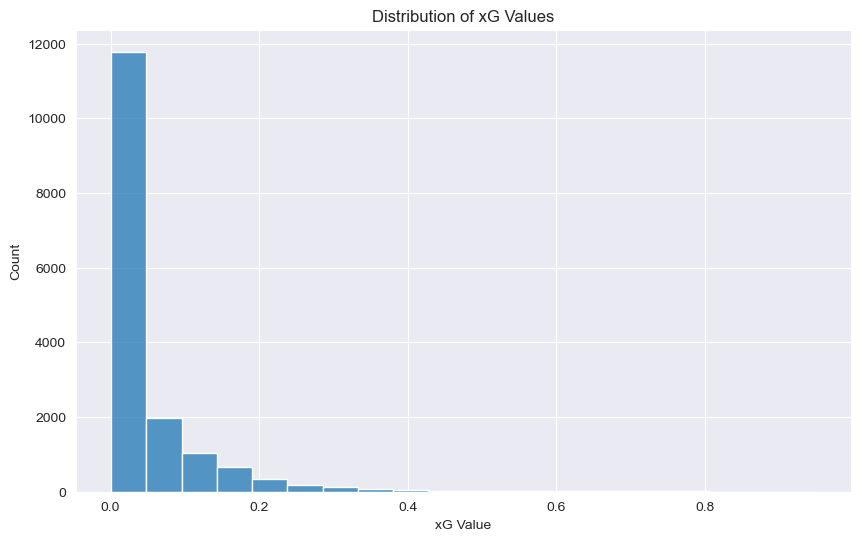

In [6]:
print("\nExamining shot events and xG values:")

# Check for different event types that might be shots
shot_related_events = ['shot', 'goal', 'save', 'block', 'miss']  # These are common shot event names
event_counts = data['eventname'].value_counts()
print("\nEvent name counts:")
display(event_counts)

# Look at events with xG values
events_with_xg = data[data['xg_allattempts'].notna()]
print(f"\nNumber of events with xG values: {events_with_xg.shape[0]}")
if not events_with_xg.empty:
    print("Events with xG values:")
    display(events_with_xg[['eventname', 'xg_allattempts', 'outcome', 'type']].head(10))
    
    # Distribution of xG values
    plt.figure(figsize=(10, 6))
    sns.histplot(events_with_xg['xg_allattempts'], bins=20)
    plt.title('Distribution of xG Values')
    plt.xlabel('xG Value')
    plt.ylabel('Count')
    plt.show()
else:
    print("No events with xG values found in the sample data.")

# 4. SEGD Implementation - Component Calculations


In [23]:
def calculate_score_differential_weight(score_diff):
    """
    Calculate weight based on score differential
    Higher weight for closer games
    """
    K = 0.2  # Calibration constant
    return 1 + (K / (abs(score_diff) + 1))

def calculate_period_time_adjustment(period, game_time):
    """
    Calculate adjustment based on period and time
    Higher weight for later periods and critical times
    """
    # Base period weights
    period_weights = {1: 1.0, 2: 1.05, 3: 1.1, 4: 1.25}  # Period 4 is overtime
    
    # Default to highest weight if period not found
    period_weight = period_weights.get(period, 1.25)
    
    # We would need more detailed game time info to implement critical time windows
    # For now, just use period weight
    return period_weight
def calculate_manpower_adjustment(team_skaters, opposing_skaters):
    """
    Calculate adjustment based on exact skater counts, ignoring the manpower situation string.
    A team with more skaters has an easier time making saves (lower multiplier).
    A team with fewer skaters has a harder time making saves (higher multiplier).
    """
    skater_diff = team_skaters - opposing_skaters
    
    if skater_diff == 0:
        return 1.0  # Even strength
    else:
        # For each skater advantage, reduce difficulty by 10%
        # For each skater disadvantage, increase difficulty by 20%
        # This makes short-handed situations significantly harder
        return 1.0 + (-0.1 if skater_diff > 0 else 0.2) * abs(skater_diff)

# 5. Initial SEGD Score Calculation Function


In [14]:
def calculate_segd(row):
    """
    Calculate the SEGD value for a single event based on available factors
    """
    # Start with base xG if available
    base_xg = row.get('xg_allattempts', 0)
    if pd.isna(base_xg) or base_xg == 0:
        return None  # Can't calculate SEGD without xG
    
    # Factor 1: Score Differential Weight
    score_diff = row.get('scoredifferential', 0)
    if pd.isna(score_diff):
        score_diff = 0
    sdw = calculate_score_differential_weight(score_diff)
    
    # Factor 2: Period/Time Adjustment
    period = row.get('period', 1)
    if pd.isna(period):
        period = 1
    game_time = row.get('compiledgametime', 0)
    if pd.isna(game_time):
        game_time = 0
    pta = calculate_period_time_adjustment(period, game_time)
    
    # Factor 3: Manpower Situation
    situation = row.get('manpowersituation', 'evenStrength')
    team_skaters = row.get('teamskatersonicecount', 5)
    opposing_skaters = row.get('opposingteamskatersonicecount', 5)
    if pd.isna(team_skaters):
        team_skaters = 5
    if pd.isna(opposing_skaters):
        opposing_skaters = 5
    msr = calculate_manpower_adjustment(situation, team_skaters, opposing_skaters)
    
    # Calculate initial SEGD
    # For now, we're only using 3 factors, but we would add more as developed
    segd = base_xg * sdw * pta * msr
    
    return segd

# 6. Apply Initial SEGD Calculation to Shot Events



Calculating initial SEGD values for events with xG...

Comparison of xG and SEGD values:


,eventname,xg_allattempts,segd,scoredifferential,period,manpowersituation
71,shot,0.007322,0.008786,0,1,evenStrength
91,shot,0.003416,0.003689,0,1,powerPlay
117,shot,0.179716,0.258791,0,1,shortHanded
135,shot,0.148124,0.146643,-1,1,powerPlay
186,shot,0.014037,0.013896,-1,1,powerPlay
192,shot,0.009553,0.009458,-1,1,powerPlay
292,shot,0.002109,0.002320,1,1,evenStrength
295,shot,0.036570,0.040228,1,1,evenStrength
313,shot,0.003481,0.003713,2,1,evenStrength
336,shot,0.023354,0.024911,-2,1,evenStrength


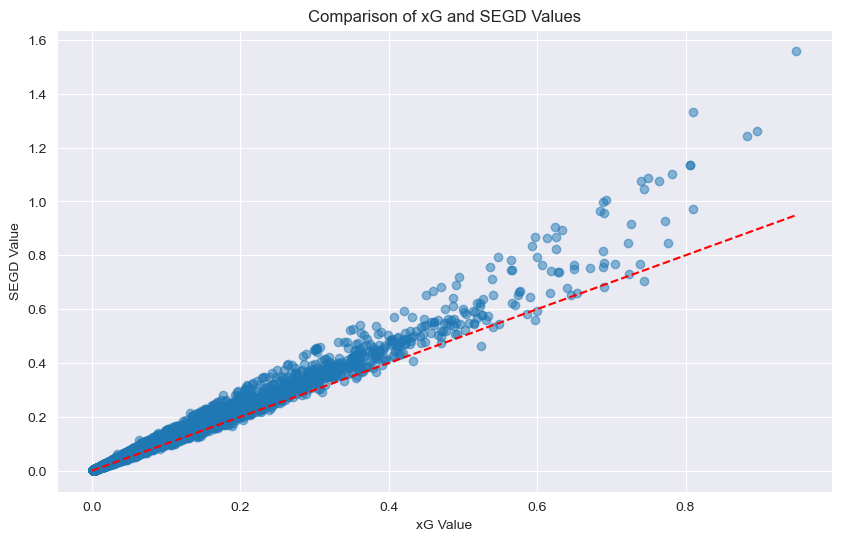

In [15]:
# Apply SEGD calculation to events with xG values
if not events_with_xg.empty:
    print("\nCalculating initial SEGD values for events with xG...")
    events_with_xg['segd'] = events_with_xg.apply(calculate_segd, axis=1)
    
    # Compare xG and SEGD
    events_with_xg_and_segd = events_with_xg[events_with_xg['segd'].notna()]
    if not events_with_xg_and_segd.empty:
        print("\nComparison of xG and SEGD values:")
        display(events_with_xg_and_segd[['eventname', 'xg_allattempts', 'segd', 'scoredifferential', 'period', 'manpowersituation']].head(10))
        
        # Plot comparison
        plt.figure(figsize=(10, 6))
        plt.scatter(events_with_xg_and_segd['xg_allattempts'], events_with_xg_and_segd['segd'], alpha=0.5)
        plt.plot([0, events_with_xg_and_segd['xg_allattempts'].max()], [0, events_with_xg_and_segd['xg_allattempts'].max()], 'r--')
        plt.title('Comparison of xG and SEGD Values')
        plt.xlabel('xG Value')
        plt.ylabel('SEGD Value')
        plt.grid(True)
        plt.show()
    else:
        print("No events with both xG and SEGD values found.")
else:
    print("No events with xG values to calculate SEGD.")


In [30]:
# 8. Sequence Context Factor Implementation
# ========================================

def calculate_sequence_context_factor(data, shot_index, lookback_window=10, lookback_time=20):
    """
    Calculate a sequence context factor based on events leading up to a shot
    
    Parameters:
    - data: DataFrame of all game events
    - shot_index: Index of the shot event
    - lookback_window: Maximum number of events to look back
    - lookback_time: Maximum seconds to look back
    
    Returns:
    - sequence_factor: Multiplier for SEGD based on sequence context
    """
    # Get the shot event
    shot_event = data.iloc[shot_index]
    game_id = shot_event['gameid']
    shot_time = shot_event['compiledgametime']
    
    # Find relevant previous events (same game, within time window)
    min_time = max(0, shot_time - lookback_time)
    
    prev_events = data[(data['gameid'] == game_id) & 
                       (data['compiledgametime'] >= min_time) & 
                       (data['compiledgametime'] < shot_time)]
    
    # Limit to lookback window size
    prev_events = prev_events.tail(lookback_window)
    
    # Base factor
    sequence_factor = 1.0
    
    # No previous events? Return base factor
    if prev_events.empty:
        return sequence_factor
    
    # 1. Possession Changes - more changes = more chaotic = harder saves
    possession_changes = 0
    last_possession = None
    for _, event in prev_events.iterrows():
        if pd.notna(event.get('teaminpossession')) and event['teaminpossession'] != last_possession:
            if last_possession is not None:  # Don't count the first assignment
                possession_changes += 1
            last_possession = event['teaminpossession']
    
    # Add 3% per possession change (reduced from 5%), max 15%
    sequence_factor += min(0.15, possession_changes * 0.03)
    
    # 2. Rapid Event Density - more events in short time = higher pressure
    time_span = shot_time - prev_events.iloc[0]['compiledgametime']
    if time_span > 0:
        events_per_second = len(prev_events) / time_span
        # Add up to 20% for high event density
        density_factor = min(0.2, events_per_second * 0.04)
        sequence_factor += density_factor
    
    # 3. Dangerous Event Types - certain events indicate higher pressure
    danger_events = ['carry', 'controlledentry', 'reception', 'pass']
    danger_count = prev_events[prev_events['eventname'].isin(danger_events)].shape[0]
    # Add 5% per danger event (increased from 3%), max 25%
    sequence_factor += min(0.25, danger_count * 0.05)
    
    # 4. Shot Clustering - shots in sequence indicate sustained pressure
    prior_shots = prev_events[prev_events['eventname'].isin(['shot', 'goal', 'block', 'save', 'miss'])].shape[0]
    # Add 10% per prior shot, max 30%
    sequence_factor += min(0.3, prior_shots * 0.1)
    
    return sequence_factor

# Test the sequence context factor
print("\nImplementing Sequence Context Factor (SCF)...")
try:
    if len(data) > 10:  # Ensure we have enough data
        # Find a shot event for testing
        shot_indices = data[data['eventname'].isin(['shot', 'goal', 'save', 'block', 'miss'])].index
        if len(shot_indices) > 0:
            test_shot_index = shot_indices[0]
            scf = calculate_sequence_context_factor(data, test_shot_index)
            print(f"Sample SCF for shot at index {test_shot_index}: {scf:.2f}")
            
            # Show the events leading to this shot
            game_id = data.iloc[test_shot_index]['gameid']
            shot_time = data.iloc[test_shot_index]['compiledgametime']
            min_time = max(0, shot_time - 20)
            
            seq_events = data[(data['gameid'] == game_id) & 
                             (data['compiledgametime'] >= min_time) & 
                             (data['compiledgametime'] <= shot_time)]
            
            print(f"\nEvents leading to shot (last 20 seconds, same game):")
            display(seq_events[['eventname', 'compiledgametime', 'teaminpossession', 'outcome']].tail(10))
        else:
            print("No shot events found for SCF testing.")
    else:
        print("Insufficient data for SCF testing.")
except Exception as e:
    print(f"Error in SCF implementation: {e}")


Implementing Sequence Context Factor (SCF)...
Sample SCF for shot at index 7: 1.21

Events leading to shot (last 20 seconds, same game):


,eventname,compiledgametime,teaminpossession,outcome
0,faceoff,0.000000,NaN,failed
1,faceoff,0.000000,NaN,successful
2,lpr,1.333333,885.0,successful
3,lpr,1.333333,885.0,failed
4,pass,2.166667,885.0,successful
5,reception,2.966667,885.0,successful
6,pass,4.466667,885.0,failed
7,block,4.700000,885.0,successful


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def draw_hockey_rink(ax):
    ax.set_xlim(-100, 100)
    ax.set_ylim(-70, 15)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)    # Center ice
    ax.axhline(y=0, color='red', linestyle='-', linewidth=1)        # Goal line
    ax.axhline(y=-42.5, color='blue', linestyle='-', linewidth=1)   # Blue line
    ax.grid(True, linestyle='--', alpha=0.3)

def plot_shot_density(data, title="Shot Density Map"):
    if 'xadjcoord' not in data.columns or 'yadjcoord' not in data.columns:
        print("Missing coordinate columns.")
        return
    shot_types = ['shot', 'goal', 'save', 'block', 'miss']
    shot_data = data[data['eventname'].isin(shot_types)]
    if shot_data.empty:
        print("No shot data found.")
        return
    plt.figure(figsize=(12,8))
    plt.axhline(y=0, color='red', linewidth=1)
    plt.axhline(y=-42.5, color='blue', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=0.5)
    plt.hist2d(shot_data['xadjcoord'], shot_data['yadjcoord'], bins=50, cmap='hot', alpha=0.7)
    plt.colorbar(label='Shot Frequency')
    plt.xlim(-100, 100)
    plt.ylim(-70, 15)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.tight_layout()
    plt.show()




In [32]:
def calculate_team_defense_factors(data):
    team_factors = {}
    teams = set(data['teamid'].dropna().unique()).union(set(data['opposingteamid'].dropna().unique()))
    for team in teams:
        defense_data = data[data['opposingteamid'] == team]
        if len(defense_data) < 10:
            continue
        entry_attempts = defense_data[defense_data['eventname'] == 'controlledentry'].shape[0]
        successful_entries = defense_data[(defense_data['eventname'] == 'controlledentry') & (defense_data['outcome'] == 'successful')].shape[0]
        entry_rate = successful_entries / entry_attempts if entry_attempts > 0 else 0
        turnovers = defense_data[defense_data['eventname'].isin(['check', 'block', 'icing'])].shape[0]
        turnover_rate = turnovers / len(defense_data)
        shot_rate = defense_data[defense_data['eventname'].isin(['shot', 'goal', 'block', 'save', 'miss'])].shape[0] / len(defense_data)
        shot_suppression = 1 - shot_rate
        entry_factor = 1 - entry_rate
        defensive_quality = entry_factor * 0.4 + turnover_rate * 0.3 + shot_suppression * 0.3
        team_factors[team] = {'defensive_quality': defensive_quality}
    return team_factors

def calculate_opposition_quality(data):
    opp_factors = {}
    teams = set(data['teamid'].dropna().unique()).union(set(data['opposingteamid'].dropna().unique()))
    for team in teams:
        offense_data = data[data['teamid'] == team]
        if len(offense_data) < 10:
            continue
        entry_attempts = offense_data[offense_data['eventname'] == 'controlledentry'].shape[0]
        successful_entries = offense_data[(offense_data['eventname'] == 'controlledentry') & (offense_data['outcome'] == 'successful')].shape[0]
        entry_rate = successful_entries / entry_attempts if entry_attempts > 0 else 0
        shots_for = offense_data[offense_data['eventname'].isin(['shot', 'goal'])].shape[0]
        shot_rate = shots_for / len(offense_data)
        goals = offense_data[offense_data['eventname'] == 'goal'].shape[0]
        shooting_pct = goals / shots_for if shots_for > 0 else 0
        offensive_quality = entry_rate * 0.3 + shot_rate * 0.4 + shooting_pct * 0.3
        opp_factors[team] = {'offensive_quality': offensive_quality}
    return opp_factors



In [25]:
def calculate_enhanced_segd(row, danger_zones, team_factors, opposition_factors):
    # Base expected goals from all attempts
    base_xg = row.get('xg_allattempts', 0)
    if pd.isna(base_xg) or base_xg == 0:
        return None
    # For demonstration, we assume placeholder functions for the adjustments:
    sdw = calculate_score_differential_weight(row.get('scoredifferential', 0))
    pta = calculate_period_time_adjustment(row.get('period', 1), row.get('compiledgametime', 0))
    msr = calculate_manpower_adjustment(row.get('teamskatersonicecount', 5),
                                  row.get('opposingteamskatersonicecount', 5))
    spa = get_zone_danger(row.get('xadjcoord', 0), row.get('yadjcoord', 0), danger_zones)
    team_id = row.get('teamid', None)
    defensive_quality = team_factors.get(team_id, {}).get('defensive_quality', 1.0)
    tsc = 1.0 + (1.0 - defensive_quality)
    opp_team = row.get('opposingteamid', None)
    offensive_quality = opposition_factors.get(opp_team, {}).get('offensive_quality', 1.0)
    oqf = 1.0 + offensive_quality
    segd = base_xg * sdw * pta * msr * spa * tsc * oqf
    return {'base_xg': base_xg, 'sdw': sdw, 'pta': pta, 'msr': msr,
            'spa': spa, 'tsc': tsc, 'oqf': oqf, 'segd': segd}


In [26]:
def create_danger_zones():
    """Create a mapping of ice regions to danger levels"""
    # Define danger zones (simplistic version)
    # In a full implementation, these would be calibrated with real data
    danger_zones = {
        'slot': {'x_min': -25, 'x_max': 25, 'y_min': -40, 'y_max': 0, 'danger': 1.5},
        'left_circle': {'x_min': -25, 'x_max': 0, 'y_min': -25, 'y_max': 0, 'danger': 1.3},
        'right_circle': {'x_min': 0, 'x_max': 25, 'y_min': -25, 'y_max': 0, 'danger': 1.3},
        'point': {'x_min': -25, 'x_max': 25, 'y_min': -60, 'y_max': -40, 'danger': 1.1},
        'behind_net': {'x_min': -25, 'x_max': 25, 'y_min': 0, 'y_max': 10, 'danger': 1.2},
        'perimeter': {'x_min': -100, 'x_max': 100, 'y_min': -100, 'y_max': 100, 'danger': 1.0}  # default
    }
    return danger_zones

def get_zone_danger(x, y, danger_zones):
    """Get the danger multiplier for a specific location"""
    for zone, coords in danger_zones.items():
        if coords['x_min'] <= x <= coords['x_max'] and coords['y_min'] <= y <= coords['y_max']:
            return coords['danger']
    return 1.0  # Default if no zone matches

    base_xg  sdw  pta  msr  spa       tsc       oqf      segd
0  0.007322  1.0  1.0  1.0  1.0  1.689221  1.306114  0.016154
1  0.003416  1.0  1.0  1.0  1.0  1.689221  1.306114  0.007536
2  0.179716  1.0  1.0  1.0  1.0  1.687998  1.309900  0.397372
3  0.148124  1.0  1.0  1.0  1.0  1.689221  1.306114  0.326809
4  0.014037  1.0  1.0  1.0  1.0  1.689221  1.306114  0.030970


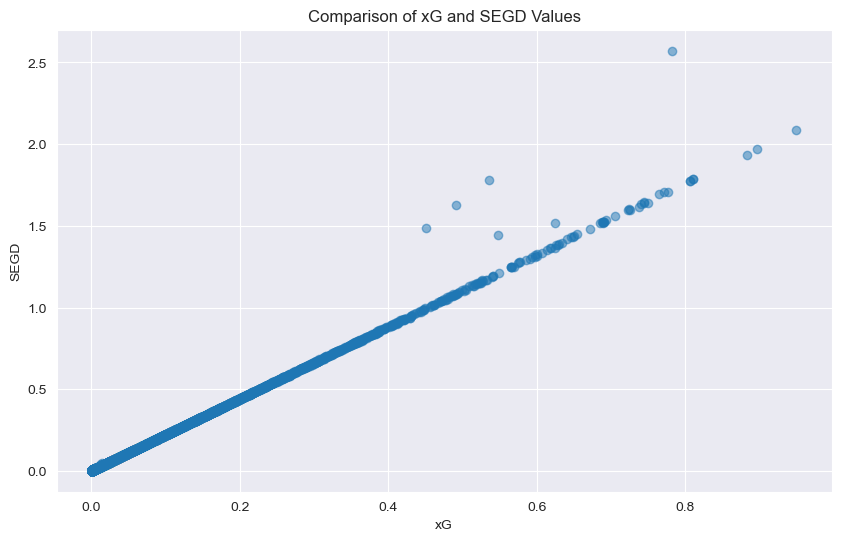

In [33]:
# Precompute static components:
danger_zones = create_danger_zones()  # Function that returns a dictionary of spatial zones and danger multipliers
team_factors = calculate_team_defense_factors(data)
opposition_factors = calculate_opposition_quality(data)

# Filter events that have non-null xG values
events_with_xg = data[data['xg_allattempts'].notna()]

# Compute SEGD for each event using apply (or ideally vectorize)
segd_results = events_with_xg.apply(lambda row: calculate_enhanced_segd(row, danger_zones, team_factors, opposition_factors), axis=1)
segd_results = segd_results.dropna()
segd_df = pd.DataFrame(list(segd_results))
print(segd_df.head())

# You can now analyze the SEGD value in relation to xG, or the distribution of the multipliers:
plt.figure(figsize=(10,6))
plt.scatter(segd_df['base_xg'], segd_df['segd'], alpha=0.5)
plt.xlabel("xG")
plt.ylabel("SEGD")
plt.title("Comparison of xG and SEGD Values")
plt.grid(True)
plt.show()


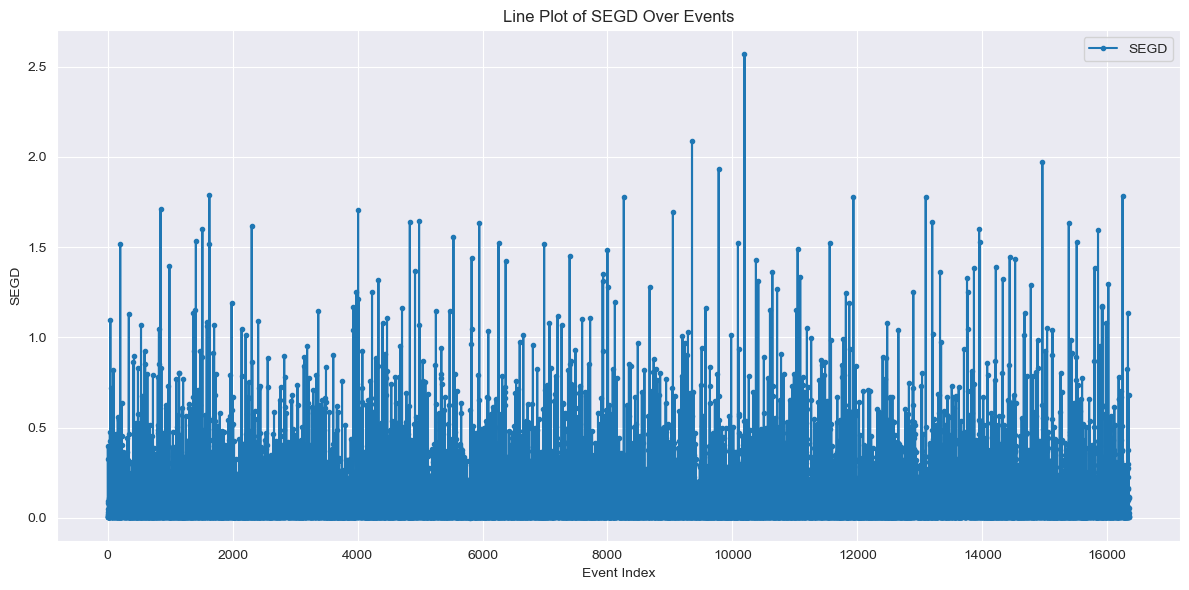

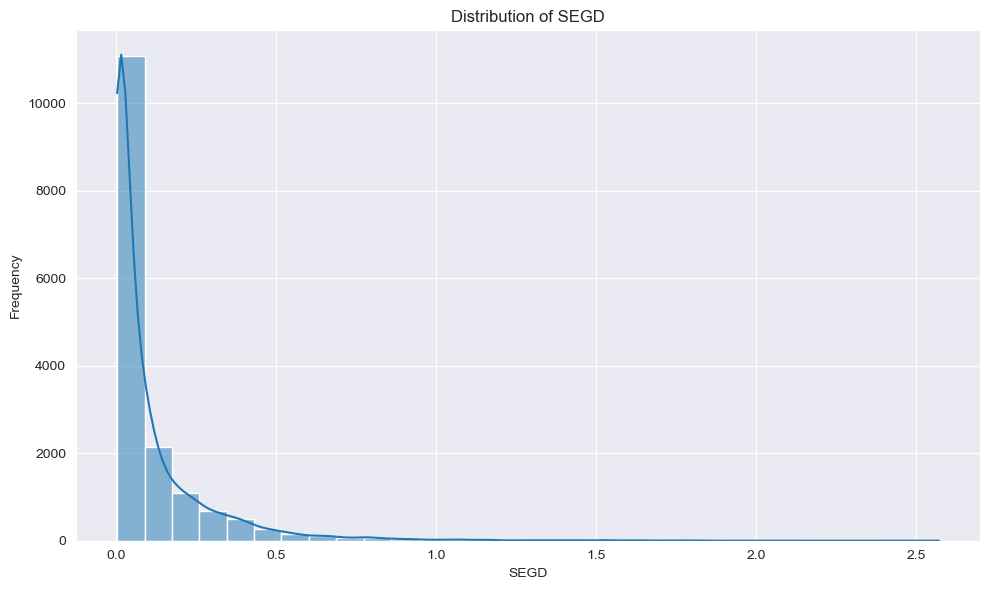

In [34]:
# 1. Line Plot of SEGD Over Events

# Check if 'event_idx' is a column; if not, use the DataFrame index.
if 'event_idx' in segd_df.columns:
    segd_df_sorted = segd_df.sort_values('event_idx')
    x_values = segd_df_sorted['event_idx']
else:
    segd_df_sorted = segd_df.sort_index()
    x_values = segd_df_sorted.index

plt.figure(figsize=(12, 6))
plt.plot(x_values, segd_df_sorted['segd'], '-o', markersize=3, label='SEGD')
plt.xlabel("Event Index")
plt.ylabel("SEGD")
plt.title("Line Plot of SEGD Over Events")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Distribution Plot of SEGD Values
plt.figure(figsize=(10, 6))
sns.histplot(segd_df['segd'], kde=True, bins=30)
plt.xlabel("SEGD")
plt.ylabel("Frequency")
plt.title("Distribution of SEGD")
plt.grid(True)
plt.tight_layout()
plt.show()


Computing SEGD for events...


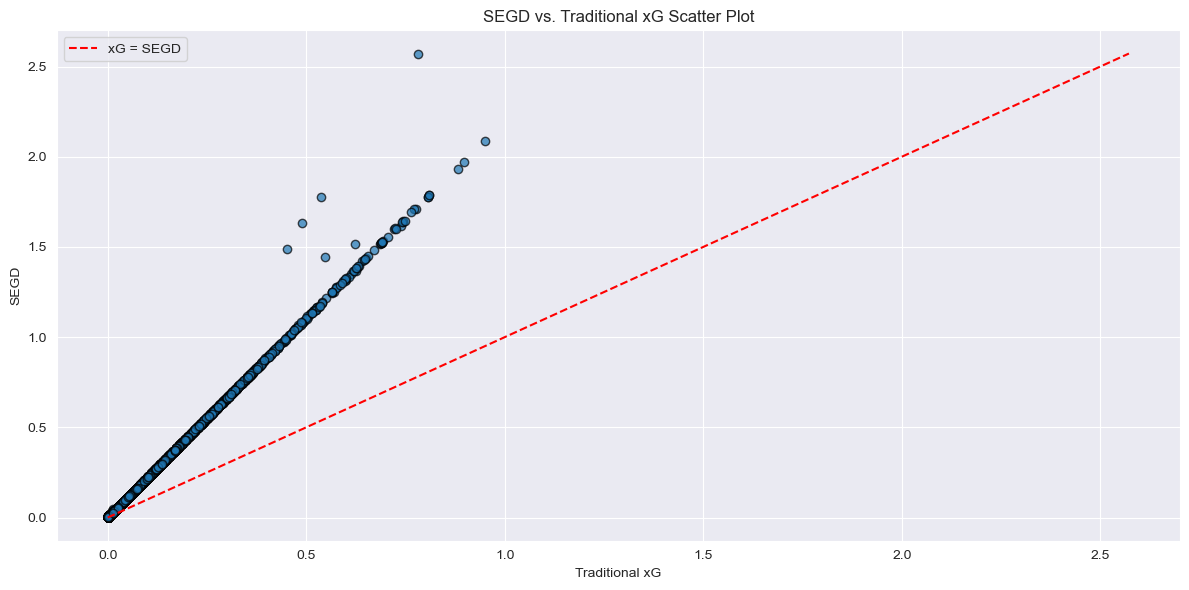

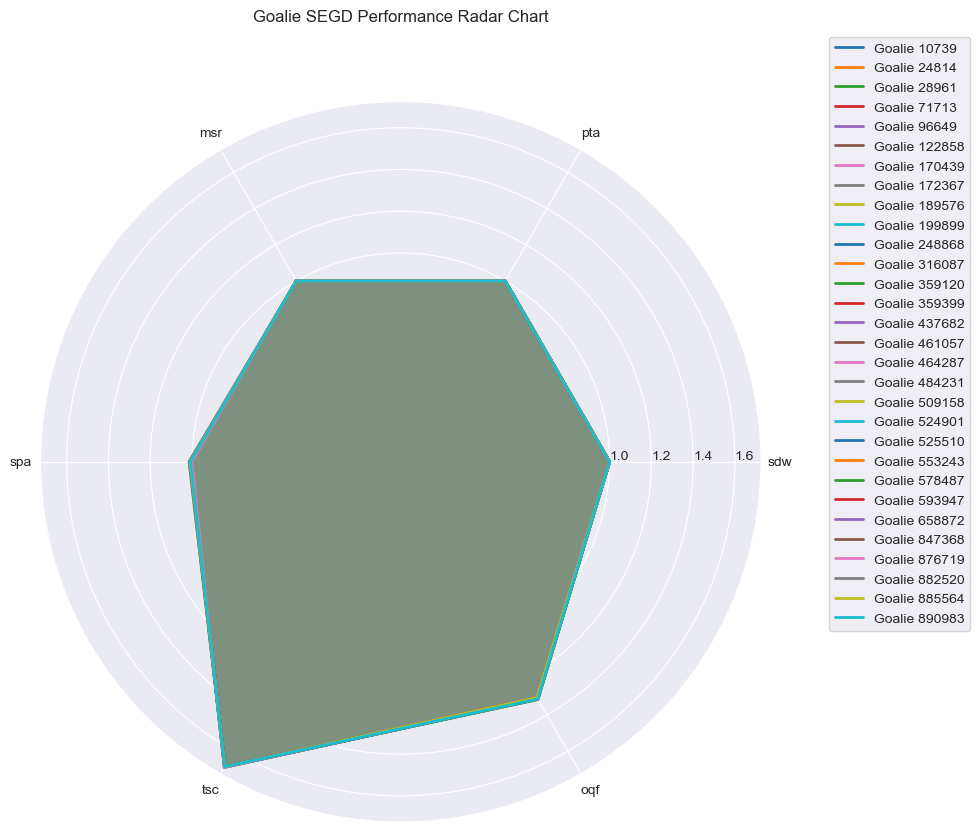

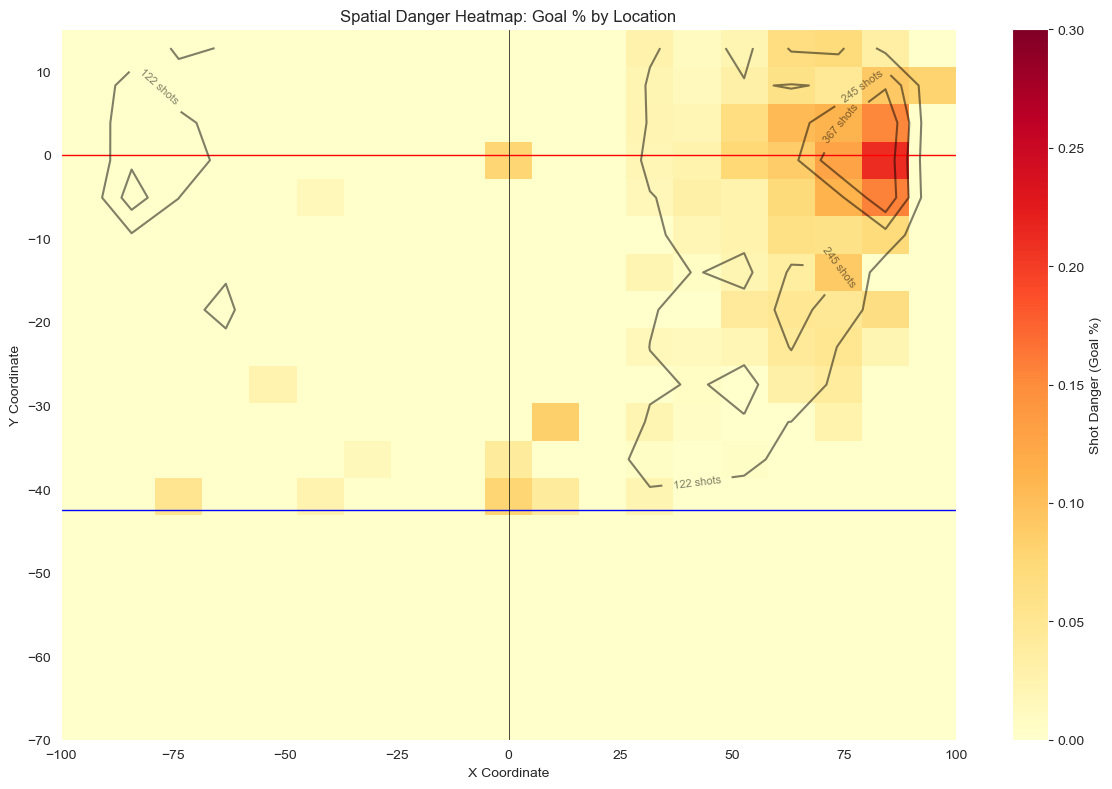

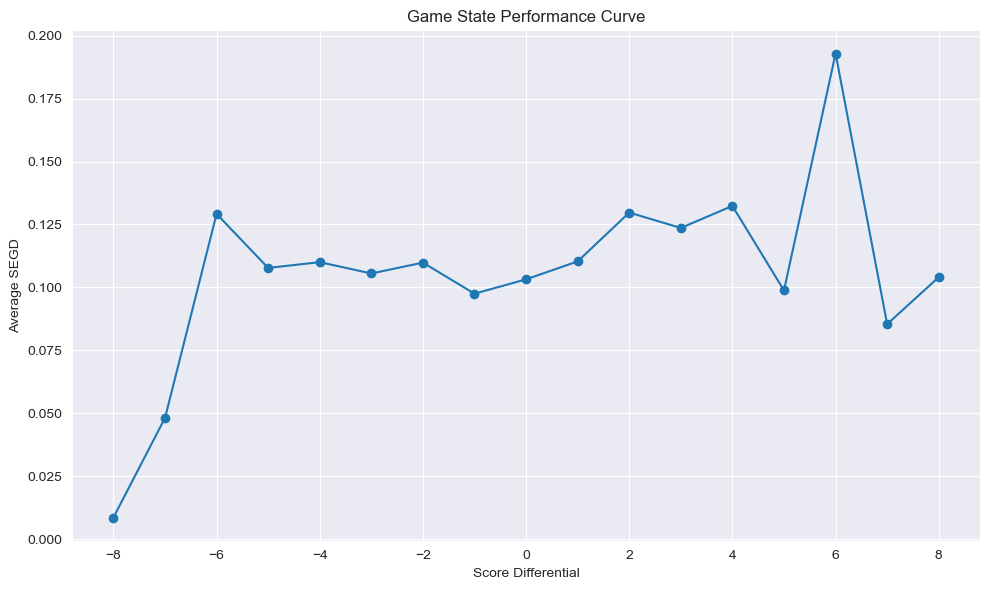

Sequence Recovery Visualization: Required columns not found. Skipping Plot 5.


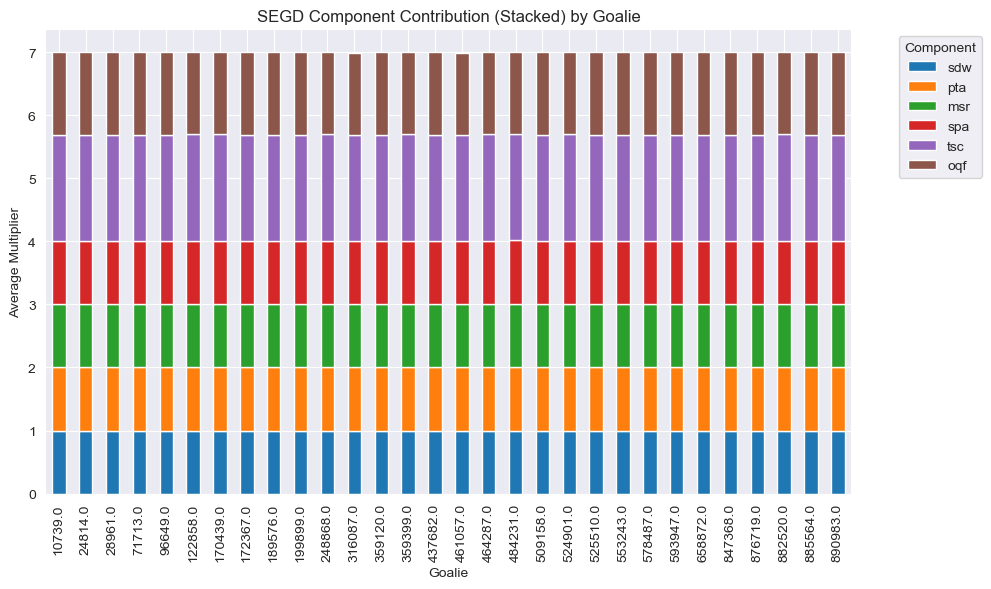

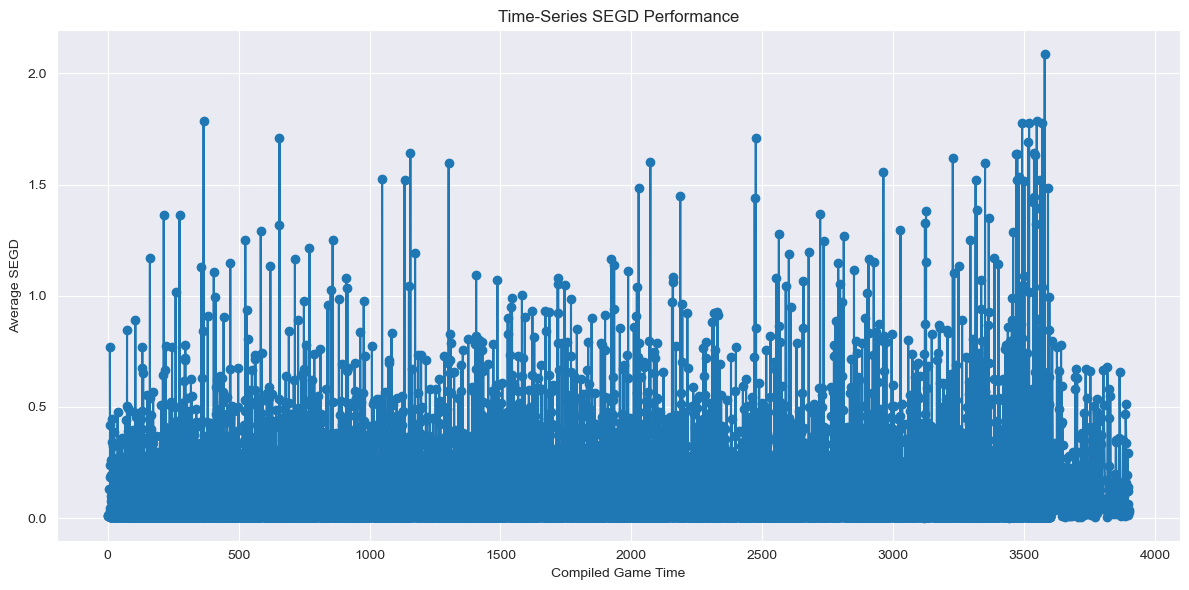

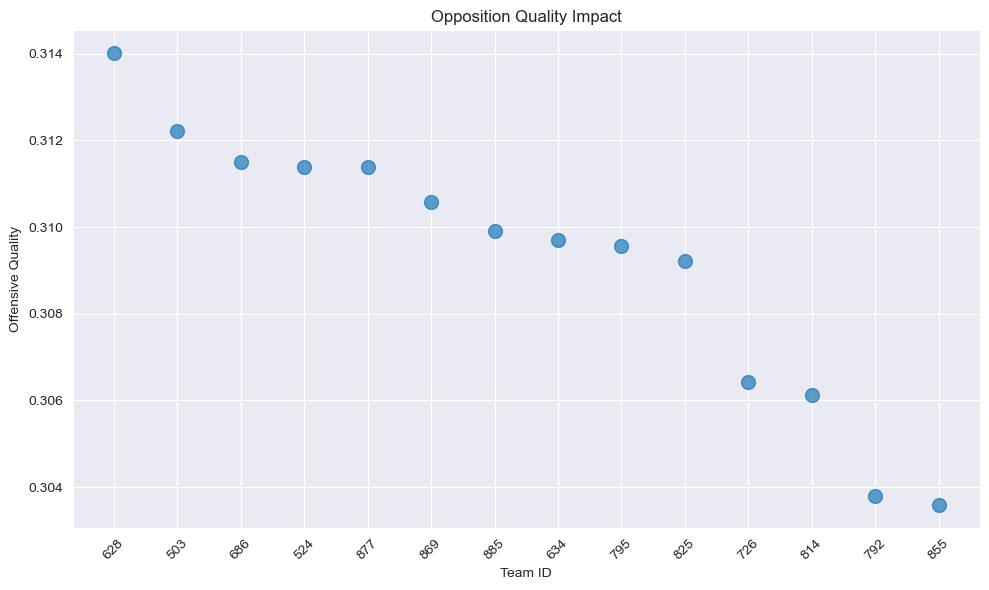

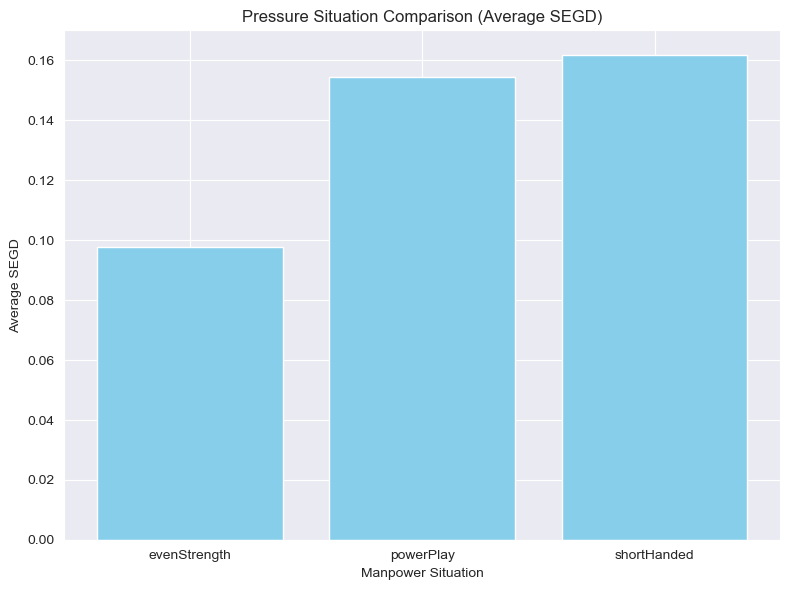

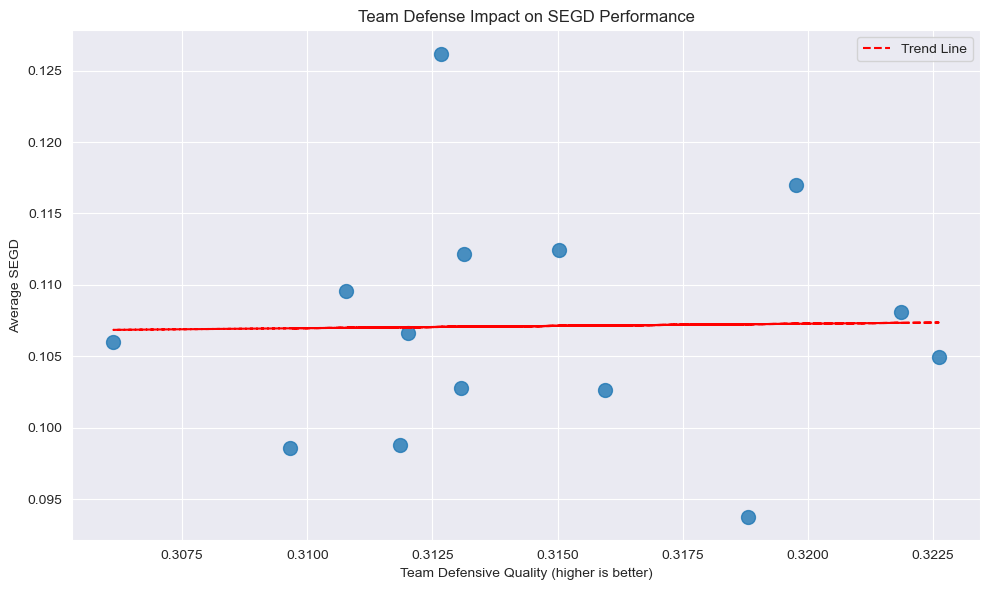

All plots completed.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Section 1: Spatial Analysis Functions
# =========================

def create_danger_zones():
    """
    Define spatial zones and assign a danger multiplier to each.
    These multipliers can be calibrated using historical data.
    """
    danger_zones = {
        'slot': {'x_min': -25, 'x_max': 25, 'y_min': -40, 'y_max': 0, 'danger': 1.5},
        'left_circle': {'x_min': -25, 'x_max': 0, 'y_min': -25, 'y_max': 0, 'danger': 1.3},
        'right_circle': {'x_min': 0, 'x_max': 25, 'y_min': -25, 'y_max': 0, 'danger': 1.3},
        'point': {'x_min': -25, 'x_max': 25, 'y_min': -60, 'y_max': -40, 'danger': 1.1},
        'behind_net': {'x_min': -25, 'x_max': 25, 'y_min': 0, 'y_max': 10, 'danger': 1.2},
        'perimeter': {'x_min': -100, 'x_max': 100, 'y_min': -70, 'y_max': 15, 'danger': 1.0}
    }
    return danger_zones

def get_zone_danger(x, y, danger_zones):
    """
    Return the danger multiplier for coordinates (x, y) based on defined zones.
    If no zone matches, return 1.0.
    """
    for zone, coords in danger_zones.items():
        if coords['x_min'] <= x <= coords['x_max'] and coords['y_min'] <= y <= coords['y_max']:
            return coords['danger']
    return 1.0

def draw_hockey_rink(ax):
    """
    Draw a simple hockey rink outline for context.
    """
    ax.set_xlim(-100, 100)
    ax.set_ylim(-70, 15)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)   # Center ice
    ax.axhline(y=0, color='red', linestyle='-', linewidth=1)       # Near goal (net)
    ax.axhline(y=-42.5, color='blue', linestyle='-', linewidth=1)  # Blue line
    ax.grid(True, linestyle='--', alpha=0.3)

def plot_shot_density(data, title="Shot Density Map"):
    """
    Plot a 2D histogram for overall shot density.
    """
    if 'xadjcoord' not in data.columns or 'yadjcoord' not in data.columns:
        print("Missing coordinate columns.")
        return
    shot_types = ['shot', 'goal', 'save', 'block', 'miss']
    shot_data = data[data['eventname'].isin(shot_types)]
    if shot_data.empty:
        print("No shot data found.")
        return
    plt.figure(figsize=(12,8))
    plt.axhline(y=0, color='red', linewidth=1)
    plt.axhline(y=-42.5, color='blue', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=0.5)
    plt.hist2d(shot_data['xadjcoord'], shot_data['yadjcoord'], bins=50, cmap='hot', alpha=0.7)
    plt.colorbar(label='Shot Frequency')
    plt.xlim(-100, 100)
    plt.ylim(-70, 15)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.tight_layout()
    plt.show()

def analyze_shot_danger_by_location(data):
    """
    Create a spatial danger heatmap (goal % by location) as a proxy for shot danger.
    Returns the computed danger grid and produces a plot.
    """
    if 'xadjcoord' not in data.columns or 'yadjcoord' not in data.columns:
        print("Missing coordinate columns.")
        return
    shots = data[data['eventname'].isin(['shot', 'goal', 'save'])]
    if shots.empty:
        print("No shot data for analysis.")
        return
    x_bins = np.linspace(-100, 100, 20)
    y_bins = np.linspace(-70, 15, 20)
    grid_shots = np.zeros((len(y_bins)-1, len(x_bins)-1))
    grid_goals = np.zeros((len(y_bins)-1, len(x_bins)-1))
    for _, shot in shots.iterrows():
        x, y = shot['xadjcoord'], shot['yadjcoord']
        x_idx = np.digitize(x, x_bins) - 1
        y_idx = np.digitize(y, y_bins) - 1
        if 0 <= x_idx < len(x_bins)-1 and 0 <= y_idx < len(y_bins)-1:
            grid_shots[y_idx, x_idx] += 1
            if shot['eventname'] == 'goal':
                grid_goals[y_idx, x_idx] += 1
    grid_danger = np.divide(grid_goals, grid_shots, out=np.zeros_like(grid_goals), where=grid_shots>5)
    
    plt.figure(figsize=(12,8))
    plt.axhline(y=0, color='red', linewidth=1)
    plt.axhline(y=-42.5, color='blue', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=0.5)
    X, Y = np.meshgrid(x_bins[:-1] + np.diff(x_bins)/2, y_bins[:-1] + np.diff(y_bins)/2)
    plt.pcolormesh(X, Y, grid_danger, cmap='YlOrRd', shading='auto', vmin=0, vmax=0.3)
    cbar = plt.colorbar(label='Goal % (Danger)')
    cbar.set_label('Shot Danger (Goal %)')
    CS = plt.contour(X, Y, grid_shots, colors='black', alpha=0.5,
                     levels=np.linspace(grid_shots.min(), grid_shots.max(), 5)[1:])
    plt.clabel(CS, inline=True, fontsize=8, fmt='%d shots')
    plt.title('Spatial Danger Heatmap: Goal % by Location')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.xlim(-100, 100)
    plt.ylim(-70, 15)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    return grid_danger

# =========================
# Section 2: Team and Opposition Quality Functions
# =========================

def calculate_team_defense_factors(data):
    """
    Calculate defensive system metrics for each team.
    Returns a dictionary keyed by team ID.
    """
    team_factors = {}
    teams = set(data['teamid'].dropna().unique()).union(set(data['opposingteamid'].dropna().unique()))
    for team in teams:
        defense_data = data[data['opposingteamid'] == team]
        if len(defense_data) < 10:
            continue
        entry_attempts = defense_data[defense_data['eventname'] == 'controlledentry'].shape[0]
        successful_entries = defense_data[(defense_data['eventname'] == 'controlledentry') &
                                          (defense_data['outcome'] == 'successful')].shape[0]
        entry_rate = successful_entries / entry_attempts if entry_attempts > 0 else 0
        turnovers = defense_data[defense_data['eventname'].isin(['check', 'block', 'icing'])].shape[0]
        turnover_rate = turnovers / len(defense_data)
        shot_rate = defense_data[defense_data['eventname'].isin(['shot', 'goal', 'block', 'save', 'miss'])].shape[0] / len(defense_data)
        shot_suppression = 1 - shot_rate
        entry_factor = 1 - entry_rate  # Lower entry success against is better
        defensive_quality = entry_factor * 0.4 + turnover_rate * 0.3 + shot_suppression * 0.3
        team_factors[team] = {'defensive_quality': defensive_quality}
    return team_factors

def calculate_opposition_quality(data):
    """
    Calculate offensive quality metrics for each team.
    Returns a dictionary keyed by team ID.
    """
    opp_factors = {}
    teams = set(data['teamid'].dropna().unique()).union(set(data['opposingteamid'].dropna().unique()))
    for team in teams:
        offense_data = data[data['teamid'] == team]
        if len(offense_data) < 10:
            continue
        entry_attempts = offense_data[offense_data['eventname'] == 'controlledentry'].shape[0]
        successful_entries = offense_data[(offense_data['eventname'] == 'controlledentry') &
                                          (offense_data['outcome'] == 'successful')].shape[0]
        entry_rate = successful_entries / entry_attempts if entry_attempts > 0 else 0
        shots_for = offense_data[offense_data['eventname'].isin(['shot', 'goal'])].shape[0]
        shot_rate = shots_for / len(offense_data)
        goals = offense_data[offense_data['eventname'] == 'goal'].shape[0]
        shooting_pct = goals / shots_for if shots_for > 0 else 0
        offensive_quality = entry_rate * 0.3 + shot_rate * 0.4 + shooting_pct * 0.3
        opp_factors[team] = {'offensive_quality': offensive_quality}
    return opp_factors

# =========================
# Section 3: Helper Functions for SEGD Components
# (Placeholders – replace with your actual adjustment models if available)
# =========================

def calculate_score_differential_weight(scorediff):
    return 1.0

def calculate_period_time_adjustment(period, game_time):
    return 1.0

def calculate_manpower_adjustment(situation, team_skaters, opposing_skaters):
    return 1.0

# =========================
# Section 4: Complete SEGD Calculation Function
# =========================

def calculate_enhanced_segd(row, danger_zones, team_factors, opposition_factors):
    """
    Compute the complete SEGD for an event by combining base xG with several multipliers.
    """
    base_xg = row.get('xg_allattempts', 0)
    if pd.isna(base_xg) or base_xg == 0:
        return None  # Cannot compute SEGD without base xG
    sdw = calculate_score_differential_weight(row.get('scoredifferential', 0))
    pta = calculate_period_time_adjustment(row.get('period', 1), row.get('compiledgametime', 0))
    msr = calculate_manpower_adjustment(row.get('manpowersituation', 'evenStrength'),
                                        row.get('teamskatersonicecount', 5),
                                        row.get('opposingteamskatersonicecount', 5))
    spa = get_zone_danger(row.get('xadjcoord', 0), row.get('yadjcoord', 0), danger_zones)
    team_id = row.get('teamid', None)
    defensive_quality = team_factors.get(team_id, {}).get('defensive_quality', 1.0)
    tsc = 1.0 + (1.0 - defensive_quality)
    opp_team = row.get('opposingteamid', None)
    offensive_quality = opposition_factors.get(opp_team, {}).get('offensive_quality', 1.0)
    oqf = 1.0 + offensive_quality
    segd = base_xg * sdw * pta * msr * spa * tsc * oqf
    return {
        'base_xg': base_xg,
        'sdw': sdw,
        'pta': pta,
        'msr': msr,
        'spa': spa,
        'tsc': tsc,
        'oqf': oqf,
        'segd': segd
    }

# =========================
# Section 5: Compute SEGD for Events
# =========================

print("Computing SEGD for events...")
danger_zones = create_danger_zones()
team_factors = calculate_team_defense_factors(data)
opposition_factors = calculate_opposition_quality(data)

events_with_xg = data[data['xg_allattempts'].notna()].copy()
events_with_xg.reset_index(inplace=True)  # Save original index in column 'index'
segd_components = events_with_xg.apply(lambda row: calculate_enhanced_segd(row, danger_zones, team_factors, opposition_factors), axis=1)
segd_components = segd_components.dropna()
segd_df = pd.DataFrame(list(segd_components))
# Add useful columns from events_with_xg
segd_df['event_idx'] = events_with_xg['index']
segd_df['scoredifferential'] = events_with_xg['scoredifferential']
segd_df['compiledgametime'] = events_with_xg['compiledgametime']
segd_df['manpowersituation'] = events_with_xg['manpowersituation']
segd_df['goalie'] = events_with_xg['opposingteamgoalieoniceid']
segd_df['teamid'] = events_with_xg['teamid']

# =========================
# Plot 1: SEGD vs. Traditional xG Scatter Plot
# =========================

if 'event_idx' in segd_df.columns:
    segd_df_sorted = segd_df.sort_values('event_idx')
    x_vals = segd_df_sorted['event_idx']
else:
    segd_df_sorted = segd_df.sort_index()
    x_vals = segd_df_sorted.index

plt.figure(figsize=(12, 6))
plt.scatter(segd_df_sorted['base_xg'], segd_df_sorted['segd'], alpha=0.7, edgecolor='k')
max_val = max(segd_df_sorted['base_xg'].max(), segd_df_sorted['segd'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='xG = SEGD')
plt.xlabel("Traditional xG")
plt.ylabel("SEGD")
plt.title("SEGD vs. Traditional xG Scatter Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Plot 2: Goalie SEGD Performance Radar Chart
# =========================
# Use only numeric columns for grouping.
numeric_cols = ['sdw', 'pta', 'msr', 'spa', 'tsc', 'oqf']
goalie_group = segd_df[['goalie'] + numeric_cols].groupby('goalie').mean(numeric_only=True)

categories = numeric_cols
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
for goalie, row in goalie_group.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f"Goalie {int(goalie)}")
    ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_rlabel_position(0)
plt.title("Goalie SEGD Performance Radar Chart", y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# =========================
# Plot 3: Spatial Heat Maps with SEGD Overlay
# =========================

grid_danger = analyze_shot_danger_by_location(data)

# =========================
# Plot 4: Game State Performance Curve
# =========================
# Group segd_df by scoredifferential and compute average SEGD.
game_state = segd_df.groupby('scoredifferential').mean(numeric_only=True)['segd'].reset_index()
plt.figure(figsize=(10, 6))
plt.plot(game_state['scoredifferential'], game_state['segd'], marker='o')
plt.xlabel("Score Differential")
plt.ylabel("Average SEGD")
plt.title("Game State Performance Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# Plot 5: Sequence Recovery Visualization
# =========================
# This plot requires 'sequence_length' and 'save_pct' in data.
if 'sequence_length' in data.columns and 'save_pct' in data.columns:
    seq_df = data.groupby('sequence_length').mean(numeric_only=True).reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(seq_df['sequence_length'], seq_df['save_pct'], marker='s')
    plt.xlabel("Number of Previous Shots in Sequence")
    plt.ylabel("Save Percentage")
    plt.title("Sequence Recovery Visualization")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Sequence Recovery Visualization: Required columns not found. Skipping Plot 5.")

# =========================
# Plot 6: SEGD Component Contribution Bar Chart
# =========================
component_cols = numeric_cols
goalie_components = segd_df.groupby('goalie')[component_cols].mean(numeric_only=True)
goalie_components.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("SEGD Component Contribution (Stacked) by Goalie")
plt.xlabel("Goalie")
plt.ylabel("Average Multiplier")
plt.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# =========================
# Plot 7: Time-Series SEGD Performance
# =========================
if 'compiledgametime' in segd_df.columns:
    time_series = segd_df.groupby('compiledgametime').mean(numeric_only=True)['segd'].reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(time_series['compiledgametime'], time_series['segd'], marker='o')
    plt.title("Time-Series SEGD Performance")
    plt.xlabel("Compiled Game Time")
    plt.ylabel("Average SEGD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Time-Series SEGD Performance: 'compiledgametime' column not found.")

# =========================
# Plot 8: Opposition Quality Impact Grid
# =========================
opp_factors = calculate_opposition_quality(data)
opp_factors_df = pd.DataFrame(opp_factors).T
opp_factors_df = opp_factors_df.sort_values('offensive_quality', ascending=False)
plt.figure(figsize=(10, 6))
plt.scatter(opp_factors_df.index.astype(str), opp_factors_df['offensive_quality'], s=100, alpha=0.7)
plt.title("Opposition Quality Impact")
plt.xlabel("Team ID")
plt.ylabel("Offensive Quality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =========================
# Plot 9: Pressure Situation Comparison
# =========================
if 'manpowersituation' in segd_df.columns:
    pressure = segd_df.groupby('manpowersituation').mean(numeric_only=True)['segd'].reset_index()
    plt.figure(figsize=(8, 6))
    plt.bar(pressure['manpowersituation'], pressure['segd'], color='skyblue')
    plt.title("Pressure Situation Comparison (Average SEGD)")
    plt.xlabel("Manpower Situation")
    plt.ylabel("Average SEGD")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Pressure Situation Comparison: 'manpowersituation' column not found.")

# =========================
# Plot 10: Team Defense Impact Plot
# =========================
if 'teamid' in segd_df.columns:
    team_segd = segd_df.groupby('teamid').mean(numeric_only=True)['segd'].reset_index()
    team_factors_df = pd.DataFrame(team_factors).T.reset_index().rename(columns={'index':'teamid'})
    merged = pd.merge(team_segd, team_factors_df, on='teamid', how='inner')
    plt.figure(figsize=(10, 6))
    plt.scatter(merged['defensive_quality'], merged['segd'], s=100, alpha=0.8)
    m, b = np.polyfit(merged['defensive_quality'], merged['segd'], 1)
    plt.plot(merged['defensive_quality'], m*merged['defensive_quality']+b, "r--", label="Trend Line")
    plt.title("Team Defense Impact on SEGD Performance")
    plt.xlabel("Team Defensive Quality (higher is better)")
    plt.ylabel("Average SEGD")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Team Defense Impact Plot: 'teamid' column not found.")

print("All plots completed.")
